VALENBICI PROYECT 

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns

In [2]:
# Read CSV files into pandas DataFrame
deploy = pd.read_csv('deployStations.csv')
train = pd.read_csv('trainingStations.csv')
test = pd.read_csv('testStations.csv')
distance = pd.read_csv('distancias_estaciones.csv')


Tenemos fichero *deploy* con los datos de mayo de las estaciones *7,8,106,110*
El fichero *train* tiene datos de las estaciones de un año entero de las estaciones *1,6,9,10,95,104,105,107,109,112,113*

In [3]:
train.info()
deploy.info()
test.info()
print(train['precipitation.l.m2'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198120 entries, 0 to 198119
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   station                      198120 non-null  int64  
 1   latitude                     198120 non-null  float64
 2   longitude                    198120 non-null  float64
 3   numDocks                     198120 non-null  int64  
 4   timestamp                    198120 non-null  float64
 5   year                         198120 non-null  int64  
 6   month                        198120 non-null  int64  
 7   day                          198120 non-null  int64  
 8   hour                         198120 non-null  int64  
 9   weekday                      198120 non-null  object 
 10  weekhour                     198120 non-null  int64  
 11  isHoliday                    198120 non-null  int64  
 12  windMaxSpeed.m.s             156064 non-null  float64
 13 

Podemos probar y revisar primero de las estaciones que se cuentan en el train, las que esten cerca de las estaciones a predecir son las estaciones que tendremos en cuenta.

In [4]:
print(distance)

   station        X1       X10      X104      X105      X106      X107  \
0        7  0.668155  0.515966  2.781240  3.026953  3.268591  3.665819   
1        8  0.923482  0.750714  2.435199  2.679080  2.914950  3.308108   
2      106  3.593521  3.606036  0.543021  0.313813  0.000000  0.453848   
3      110  3.968945  4.091112  0.940925  0.708904  0.597346  0.654877   

       X109      X110      X112      X113        X2        X3        X4  \
0  3.927129  3.715692  3.209306  3.148029  0.578547  0.257617  0.414689   
1  3.572673  3.372971  2.861704  2.811886  0.739454  0.541615  0.271538   
2  0.659364  0.597346  0.225769  0.531987  3.324009  3.367535  2.914433   
3  0.514739  0.000000  0.531186  0.590896  3.699700  3.786277  3.337544   

         X5        X6        X7        X8        X9       X95  
0  0.734364  0.479204  0.000000  0.360870  0.798914  2.907578  
1  0.442322  0.802950  0.360870  0.000000  0.440700  2.567349  
2  2.569640  3.712353  3.268591  2.914950  2.474869  0.537658

Para la estacion 7 las dos mas cercanas son de los datos que tenemos de la 10 0.515 y la 6 0.47 
Para la estacion 8 las dos mas cercanas son la 9 0.44 y la 6 0.80
Para la estacion 106 tenemos a 112 con 0.225 y 105 0.313 y 107 0.43
Para la estacion 110 tenemos la 109 0.514 ,112 con 0.53 y 113 con 0.59

Por lo tanto llegamos a la conclusion de que la estacion 1 95 104 

In [5]:
# Filtrar las filas donde la columna 'station' no es 1, 95 ni 104
filtered=train
filtered_test=test
#filtered = train.query('station not in [1, 95, 104]')
#filtered_test = test.query('station not in [1, 95, 104]')
#print(filtered['station'].unique())
filtered.info()
filtered_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198120 entries, 0 to 198119
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   station                      198120 non-null  int64  
 1   latitude                     198120 non-null  float64
 2   longitude                    198120 non-null  float64
 3   numDocks                     198120 non-null  int64  
 4   timestamp                    198120 non-null  float64
 5   year                         198120 non-null  int64  
 6   month                        198120 non-null  int64  
 7   day                          198120 non-null  int64  
 8   hour                         198120 non-null  int64  
 9   weekday                      198120 non-null  object 
 10  weekhour                     198120 non-null  int64  
 11  isHoliday                    198120 non-null  int64  
 12  windMaxSpeed.m.s             156064 non-null  float64
 13 

Es posible que las fechas alejadas tales como enero , febrero, diciembre y noviembre no nos sirvan del todo para la prediccion expresamente de jun july, deberiamos hacerla para cuando el tiempo sea asemejado y momentos del año parecidos

In [6]:
filtered = filtered.query('month not in [1,2,11,12]')
filtered_test=filtered_test.query('month not in [1,2,11,12]')

In [7]:
print(filtered['month'].unique())
filtered_test.info()

[ 3  4  5  6  7  8  9 10]
<class 'pandas.core.frame.DataFrame'>
Index: 1172 entries, 0 to 1171
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   station                      1172 non-null   int64  
 1   latitude                     1172 non-null   float64
 2   longitude                    1172 non-null   float64
 3   numDocks                     1172 non-null   int64  
 4   timestamp                    1172 non-null   float64
 5   year                         1172 non-null   int64  
 6   month                        1172 non-null   int64  
 7   day                          1172 non-null   int64  
 8   hour                         1172 non-null   int64  
 9   weekday                      1172 non-null   object 
 10  weekhour                     1172 non-null   int64  
 11  isHoliday                    1172 non-null   int64  
 12  windMaxSpeed.m.s             1122 non-null   float64
 1

Podemos derivar variables como el dia del año el periodo del dia que es, si es por la mañana,tarde noche... o la combinacion de variables de clima como es el viento y la humedad.

In [8]:

#filtered['day_of_year'] = pd.to_datetime(filtered[['year', 'month', 'day']]).dt.dayofyear
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
filtered['day_period'] = pd.cut(filtered['hour'], bins=bins, labels=labels, right=False)
filtered['wind_humidity_interaction'] = filtered['windMeanSpeed.m.s'] * filtered['relHumidity.HR']
filtered.info()



# Convertir la fecha a día del año
#filtered_test['day_of_year'] = pd.to_datetime(filtered_test[['year', 'month', 'day']]).dt.dayofyear

# Crear categorías para el período del día
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
filtered_test['day_period'] = pd.cut(filtered_test['hour'], bins=bins, labels=labels, right=False)

# Calcular la interacción entre velocidad del viento y humedad relativa
filtered_test['wind_humidity_interaction'] = filtered_test['windMeanSpeed.m.s'] * filtered_test['relHumidity.HR']
filtered_test.info()



# Convertir la fecha a día del año
#deploy['day_of_year'] = pd.to_datetime(deploy[['year', 'month', 'day']]).dt.dayofyear

# Crear categorías para el período del día
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
deploy['day_period'] = pd.cut(deploy['hour'], bins=bins, labels=labels, right=False)

# Calcular la interacción entre velocidad del viento y humedad relativa
deploy['wind_humidity_interaction'] = deploy['windMeanSpeed.m.s'] * deploy['relHumidity.HR']
deploy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 129384 entries, 1416 to 198119
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   station                      129384 non-null  int64   
 1   latitude                     129384 non-null  float64 
 2   longitude                    129384 non-null  float64 
 3   numDocks                     129384 non-null  int64   
 4   timestamp                    129384 non-null  float64 
 5   year                         129384 non-null  int64   
 6   month                        129384 non-null  int64   
 7   day                          129384 non-null  int64   
 8   hour                         129384 non-null  int64   
 9   weekday                      129384 non-null  object  
 10  weekhour                     129384 non-null  int64   
 11  isHoliday                    129384 non-null  int64   
 12  windMaxSpeed.m.s             88016 non-null   

/var/folders/kf/ktcvbww96r16vv1gv5gv40jh0000gn/T/ipykernel_1126/1210455916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['day_period'] = pd.cut(filtered['hour'], bins=bins, labels=labels, right=False)
/var/folders/kf/ktcvbww96r16vv1gv5gv40jh0000gn/T/ipykernel_1126/1210455916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['wind_humidity_interaction'] = filtered['windMeanSpeed.m.s'] * filtered['relHumidity.HR']


no queremos que hayan valores faltantes en ninguna columna, por ejemplo en la derivacion del producto del viento-humedad existen menos registros no nulos que el Id, por tanto debemos de rellenar hasta conseguir tener los mismos registros

Las columnas con valores faltantes son:

windMaxSpeed.m.s
windMeanSpeed.m.s
windDirection.grades
temperature.C
relHumidity.HR
airPressure.mb
precipitation.l.m2
wind_humidity_interaction

In [9]:
columns_with_nans = ['windMaxSpeed.m.s', 'windMeanSpeed.m.s', 'windDirection.grades', 'temperature.C', 'relHumidity.HR', 'airPressure.mb', 'precipitation.l.m2','wind_humidity_interaction']

for column in columns_with_nans:
    median_value = filtered[column].median()
    filtered[column].fillna(median_value, inplace=True)

for column in columns_with_nans:
    median_value = filtered_test[column].median()
    filtered_test[column].fillna(median_value, inplace=True)
#deploy no hace falta porque estan todos los datos

filtered.info()
filtered_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129384 entries, 1416 to 198119
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   station                      129384 non-null  int64   
 1   latitude                     129384 non-null  float64 
 2   longitude                    129384 non-null  float64 
 3   numDocks                     129384 non-null  int64   
 4   timestamp                    129384 non-null  float64 
 5   year                         129384 non-null  int64   
 6   month                        129384 non-null  int64   
 7   day                          129384 non-null  int64   
 8   hour                         129384 non-null  int64   
 9   weekday                      129384 non-null  object  
 10  weekhour                     129384 non-null  int64   
 11  isHoliday                    129384 non-null  int64   
 12  windMaxSpeed.m.s             129384 non-null  

/var/folders/kf/ktcvbww96r16vv1gv5gv40jh0000gn/T/ipykernel_1126/2087385820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered[column].fillna(median_value, inplace=True)


In [10]:
filtered.sample()

,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,weekday,...,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes,Id,day_period,wind_humidity_interaction
135709,105,39.478288,-0.344398,30,1.399770e+09,2014,5,11,3,Sunday,...,0.0,11.0,11.178861,11.179046,12.185736,12.216939,12.0,135709,Night,30.4


Debemos hacer una codificacion de las columnas con caracteres para poder hacer el modelo predictivo

In [11]:
filtered = pd.get_dummies(filtered, columns=['weekday', 'day_period'], drop_first=False)
deploy = pd.get_dummies(deploy, columns=['weekday', 'day_period'], drop_first=False)
filtered_test = pd.get_dummies(filtered_test, columns=['weekday', 'day_period'], drop_first=False)


In [12]:
filtered.info()
print(filtered)

<class 'pandas.core.frame.DataFrame'>
Index: 129384 entries, 1416 to 198119
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   station                      129384 non-null  int64  
 1   latitude                     129384 non-null  float64
 2   longitude                    129384 non-null  float64
 3   numDocks                     129384 non-null  int64  
 4   timestamp                    129384 non-null  float64
 5   year                         129384 non-null  int64  
 6   month                        129384 non-null  int64  
 7   day                          129384 non-null  int64  
 8   hour                         129384 non-null  int64  
 9   weekhour                     129384 non-null  int64  
 10  isHoliday                    129384 non-null  int64  
 11  windMaxSpeed.m.s             129384 non-null  float64
 12  windMeanSpeed.m.s            129384 non-null  float64
 13  w

In [13]:
# Convertir columnas booleanas a enteros en el conjunto de entrenamiento
boolean_cols = ['weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 
                'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday','weekday_Friday',
                'day_period_Morning', 'day_period_Afternoon', 'day_period_Evening','day_period_Night',]

for col in boolean_cols:
    filtered[col] = filtered[col].astype(int)
    filtered_test[col] = filtered_test[col].astype(int)  # Asegúrate de hacer lo mismo en el conjunto de test
    deploy[col] = deploy[col].astype(int)
    
filtered.info()

filtered = filtered.drop(columns=['timestamp', 'Id', 
                                'precipitation.l.m2', 'station'])
deploy = deploy.drop(columns=['timestamp', 'Id', 
                                'precipitation.l.m2', 'station'])
filtered_test = filtered_test.drop(columns=['timestamp', 
                                          'Id', 'precipitation.l.m2', 'station'])
filtered=pd.concat([filtered, deploy], ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 129384 entries, 1416 to 198119
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   station                      129384 non-null  int64  
 1   latitude                     129384 non-null  float64
 2   longitude                    129384 non-null  float64
 3   numDocks                     129384 non-null  int64  
 4   timestamp                    129384 non-null  float64
 5   year                         129384 non-null  int64  
 6   month                        129384 non-null  int64  
 7   day                          129384 non-null  int64  
 8   hour                         129384 non-null  int64  
 9   weekhour                     129384 non-null  int64  
 10  isHoliday                    129384 non-null  int64  
 11  windMaxSpeed.m.s             129384 non-null  float64
 12  windMeanSpeed.m.s            129384 non-null  float64
 13  w

/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1

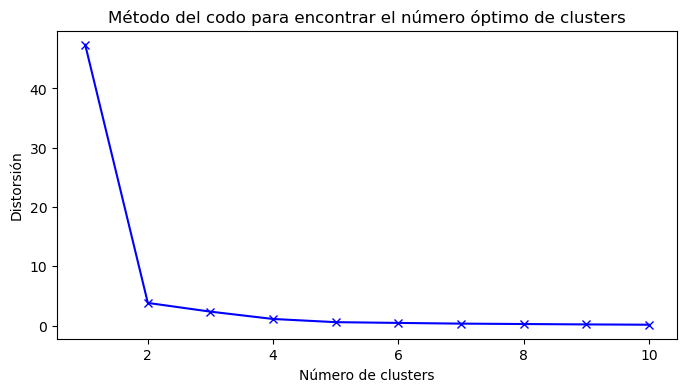

In [14]:
# Seleccionar las columnas latitude y longitude
locations = filtered[['latitude', 'longitude']]

# Método del codo para determinar el número óptimo de clusters
def plot_elbow_curve(data):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Distorsión')
    plt.title('Método del codo para encontrar el número óptimo de clusters')
    plt.show()

plot_elbow_curve(locations)


/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


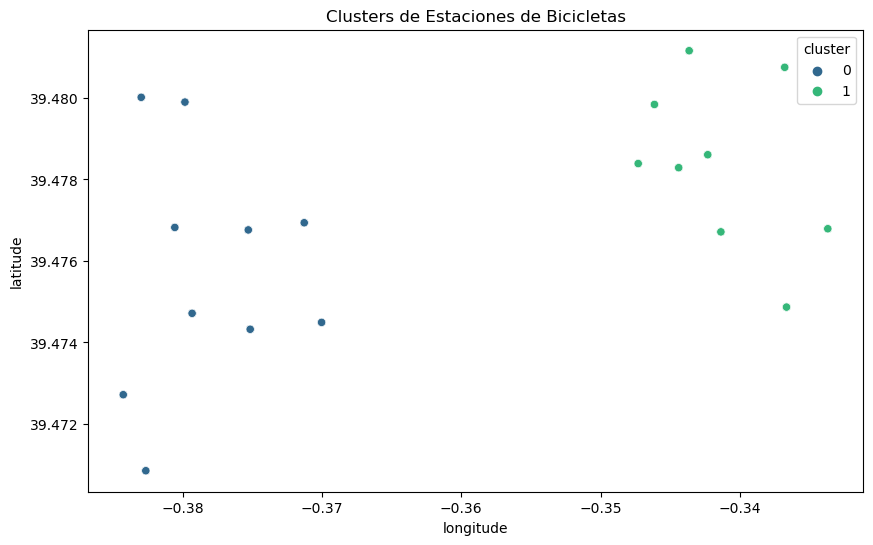

In [15]:
# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=2, random_state=42)
filtered['cluster'] = kmeans.fit_predict(locations)

# Para visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x='longitude', y='latitude', hue='cluster', palette='viridis')
plt.title('Clusters de Estaciones de Bicicletas')
plt.show()

# Agregar la columna de cluster a los datasets de train, test y deploy
filtered_test['cluster'] = kmeans.predict(filtered_test[['latitude', 'longitude']])
#deploy['cluster'] = kmeans.predict(deploy[['latitude', 'longitude']])


Es importante truncar o limitar los resultados haciendo un limite de las bikes que pueden haber en esa estacion 

Sera conveniente hacer un clustering de las estaciones cercanas(1-10 del centro de valencia) y de 100-113(de la universidad)

Comenzamos a probar un modelo de regresion lineal 

In [16]:
filtered.info()
#filtered = filtered.drop(columns=['latitude', 'longitude'])
#deploy = deploy.drop(columns=['latitude', 'longitude'])
#filtered_test = filtered_test.drop(columns=['latitude', 'longitude'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132360 entries, 0 to 132359
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   latitude                     132360 non-null  float64
 1   longitude                    132360 non-null  float64
 2   numDocks                     132360 non-null  int64  
 3   year                         132360 non-null  int64  
 4   month                        132360 non-null  int64  
 5   day                          132360 non-null  int64  
 6   hour                         132360 non-null  int64  
 7   weekhour                     132360 non-null  int64  
 8   isHoliday                    132360 non-null  int64  
 9   windMaxSpeed.m.s             132360 non-null  float64
 10  windMeanSpeed.m.s            132360 non-null  float64
 11  windDirection.grades         132360 non-null  float64
 12  temperature.C                132360 non-null  float64
 13 

In [17]:
#  Review the correlations between the characteristics and the target variable.
correlations = filtered.corr()
target_corr = correlations['bikes'].sort_values(ascending=False)
print('Correlations with the target variable:')
print(target_corr)

Correlations with the target variable:
bikes                          1.000000
bikes_3h_ago                   0.553972
full_profile_bikes             0.454717
short_profile_bikes            0.445814
short_profile_3h_diff_bikes    0.358668
full_profile_3h_diff_bikes     0.342574
longitude                      0.248245
cluster                        0.247582
numDocks                       0.198780
day_period_Afternoon           0.174268
day_period_Morning             0.140045
temperature.C                  0.110329
hour                           0.094310
weekday_Monday                 0.067370
windMaxSpeed.m.s               0.066950
windMeanSpeed.m.s              0.055201
windDirection.grades           0.029064
wind_humidity_interaction      0.025310
latitude                       0.025028
weekday_Sunday                 0.007780
weekday_Tuesday                0.006336
day                            0.004727
year                           0.002849
airPressure.mb                -0.006635
w

In [18]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestRegressor

# Definir X_train y X_test
X_train = filtered.drop(columns=['bikes','bikes_3h_ago'])
X_test = filtered_test

# Definir y_train
y_train = filtered['bikes']

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir los datos escalados a DataFrame, manteniendo los nombres de las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Crear y ajustar el modelo de RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_pred = np.round(y_pred).astype(float)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- bikes_3h_ago


Hecho con pipeline y quitando 3hbikes ago por mucha correlacion, a ver si mejoramso el modelo


In [24]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestRegressor

# Definir X_train y X_test
X_train = filtered.drop(columns=['bikes'])
X_test = filtered_test

# Definir y_train
y_train = filtered['bikes']
# Crear el pipeline con los pasos de escalado y el modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Ajustar el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Redondear las predicciones
y_pred = np.round(y_pred).astype(float)

In [25]:
sample= pd.read_csv('sample_submission_3h_ago.csv')
y_test = sample.iloc[:, 1].values

In [26]:
from sklearn.metrics import mean_absolute_error
mae_1 = mean_absolute_error(y_test, y_pred)
print(mae_1)

3.5110921501706485


In [27]:
# Crear un DataFrame con las predicciones y el Id
results = pd.DataFrame({'Id': sample['Id'], 'bikes': y_pred})


# Guardar el DataFrame en un archivo CSV
results.to_csv('predictions.csv', index=False)